# Hotel Recommendation System with Machine Learning

In [2]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from ast import literal_eval

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
data = pd.read_csv("Hotel_Reviews.csv")
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [4]:
# Replacing "United Kingdom with "UK"
data.Hotel_Address = data.Hotel_Address.str.replace("United Kingdom", "UK")

# Now I will split the address and pick the last word in the address to identify the country
data["countries"] = data.Hotel_Address.apply(lambda x: x.split(' ')[-1])
print(data.countries.unique())

['Netherlands' 'UK' 'France' 'Spain' 'Italy' 'Austria']


In [5]:
data.drop(['Additional_Number_of_Scoring',
       'Review_Date','Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'days_since_review', 'lat', 'lng'],axis=1,inplace=True)

In [6]:
def impute(column):
    column = column[0]
    if (type(column) != list):
        return "".join(literal_eval(column))
    else:
        return column
    
data["Tags"] = data[["Tags"]].apply(impute, axis=1)

In [7]:
data['countries'] = data['countries'].str.lower()
data['Tags'] = data['Tags'].str.lower()

In [8]:
data.head()

,Hotel_Address,Average_Score,Hotel_Name,Tags,countries
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,leisure trip couple duplex double room sta...,netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,leisure trip couple duplex double room sta...,netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,leisure trip family with young children dup...,netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,leisure trip solo traveler duplex double ro...,netherlands
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,leisure trip couple suite stayed 2 nights ...,netherlands


In [9]:
data.tail()

,Hotel_Address,Average_Score,Hotel_Name,Tags,countries
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,8.1,Atlantis Hotel Vienna,leisure trip family with older children 2 r...,austria
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,8.1,Atlantis Hotel Vienna,leisure trip family with young children sta...,austria
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,8.1,Atlantis Hotel Vienna,leisure trip family with older children 2 r...,austria
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,8.1,Atlantis Hotel Vienna,leisure trip group standard triple room st...,austria
515737,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,8.1,Atlantis Hotel Vienna,leisure trip family with young children 2 r...,austria


## Visualization  

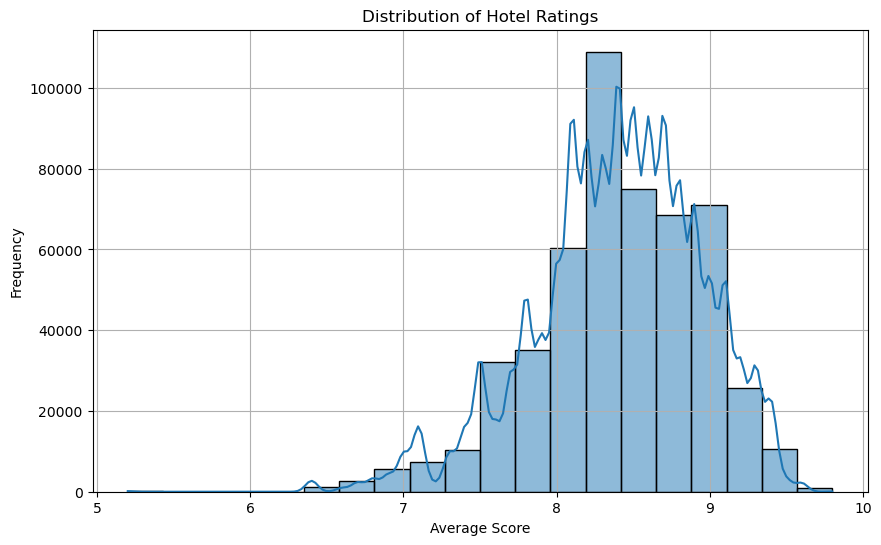

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Average_Score'], bins=20, kde=True)
plt.title('Distribution of Hotel Ratings')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.grid()
plt.show()

## Let’s See How It Works

In [11]:
def recommend_hotel(location, description):
    description = description.lower()
    word_tokenize(description)
    stop_words = stopwords.words('english')
    lemm = WordNetLemmatizer()
    filtered  = {word for word in description if not word in stop_words}
    filtered_set = set()
    for fs in filtered:
        filtered_set.add(lemm.lemmatize(fs))

    country = data[data['countries']==location.lower()]
    country = country.set_index(np.arange(country.shape[0]))
    list1 = []; list2 = []; cos = [];
    for i in range(country.shape[0]):
        temp_token = word_tokenize(country["Tags"][i])
        temp_set = [word for word in temp_token if not word in stop_words]
        temp2_set = set()
        for s in temp_set:
            temp2_set.add(lemm.lemmatize(s))
        vector = temp2_set.intersection(filtered_set)
        cos.append(len(vector))
    country['similarity']=cos
    country = country.sort_values(by='similarity', ascending=False)
    country.drop_duplicates(subset='Hotel_Name', keep='first', inplace=True)
    country.sort_values('Average_Score', ascending=False, inplace=True)
    country.reset_index(inplace=True)
    return country[["Hotel_Name", "Average_Score", "Hotel_Address"]].head()

In [12]:
recommend_hotel('Italy','I am going on a honeymoon, I need a honeymoon suite room for 3 nights')

,Hotel_Name,Average_Score,Hotel_Address
0,Excelsior Hotel Gallia Luxury Collection Hotel,9.4,Piazza Duca D Aosta 9 Central Station 20124 Mi...
1,UNA Maison Milano,9.3,Via Mazzini 4 Milan City Center 20123 Milan Italy
2,Room Mate Giulia,9.3,Silvio Pellico 4 Milan City Center 20121 Milan...
3,Palazzo Parigi Hotel Grand Spa Milano,9.3,Corso Di Porta Nuova 1 Milan City Center 20121...
4,Hotel Spadari Al Duomo,9.3,Via Spadari 11 Milan City Center 20123 Milan I...


In [13]:
recommend_hotel('Italy', 'I am going for a business trip')

,Hotel_Name,Average_Score,Hotel_Address
0,Excelsior Hotel Gallia Luxury Collection Hotel,9.4,Piazza Duca D Aosta 9 Central Station 20124 Mi...
1,Palazzo Parigi Hotel Grand Spa Milano,9.3,Corso Di Porta Nuova 1 Milan City Center 20121...
2,Hotel Spadari Al Duomo,9.3,Via Spadari 11 Milan City Center 20123 Milan I...
3,Room Mate Giulia,9.3,Silvio Pellico 4 Milan City Center 20121 Milan...
4,UNA Maison Milano,9.3,Via Mazzini 4 Milan City Center 20123 Milan Italy


In [14]:
recommend_hotel('UK','I am going on a honeymoon, I need a honeymoon suite room for 3 nights')

,Hotel_Name,Average_Score,Hotel_Address
0,Haymarket Hotel,9.6,1 Suffolk Place Westminster Borough London SW1...
1,41,9.6,41 Buckingham Palace Road Westminster Borough ...
2,Taj 51 Buckingham Gate Suites and Residences,9.5,Buckingham Gate Westminster Borough London SW1...
3,Charlotte Street Hotel,9.5,15 17 Charlotte Street Hotel Westminster Borou...
4,Ham Yard Hotel,9.5,One Ham Yard Westminster Borough London W1D 7D...
